In [2]:
import pypsa
import logging
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use("bmh")
sns.set_palette("colorblind")

logging.getLogger("gurobipy").setLevel(logging.CRITICAL)

In [3]:
url = "https://tubcloud.tu-berlin.de/s/kpWaraGc9LeaxLK/download/network-cem.nc"

n = pypsa.Network(url)

n.remove("GlobalConstraint", "CO2Limit")
n.remove("Load", "demand")
n.remove("StorageUnit", "battery storage")

n.mremove("Carrier", n.carriers.index)
n.mremove("Generator", ["OCGT", "offwind"])

n.generators.marginal_cost = 0

INFO:pypsa.io:Retrieving network data from https://tubcloud.tu-berlin.de/s/kpWaraGc9LeaxLK/download/network-cem.nc
INFO:pypsa.io:Imported network network-cem.nc has buses, carriers, generators, global_constraints, loads, storage_units


## One Segment

In [4]:
ELASTIC_INTERCEPT = 2000
LOAD = 100

In [5]:
n_notrick = n.copy()

n_notrick.add(
    "Generator",
    "load",
    bus="Germany",
    carrier="load",
    marginal_cost=ELASTIC_INTERCEPT,
    marginal_cost_quadratic=ELASTIC_INTERCEPT / (2 * LOAD),
    p_max_pu=0,
    p_min_pu=-1,
    p_nom=LOAD,
)

In [6]:
n_trick = n.copy()

n_trick.add(
    "Generator",
    "load-shedding",
    bus="Germany",
    carrier="load",
    p_nom=LOAD,
    marginal_cost_quadratic=ELASTIC_INTERCEPT / (2 * LOAD),
)

n_trick.add(
    "Load",
    "load",
    bus="Germany",
    carrier="load",
    p_set=LOAD,
)

In [7]:
n_trick.optimize(solver_name='gurobi', solver_options={"BarConvTol": 1e-9})

INFO:linopy.model: Solve problem using Gurobi solver
INFO:linopy.model:Solver options:
 - BarConvTol: 1e-09


Set parameter TokenServer to value "ensys3.service.tu-berlin.de"


INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 6/6 [00:00<00:00, 383.72it/s]
INFO:linopy.io: Writing time: 0.12s


Read LP format model from file /tmp/linopy-problem-g516makz.lp
Reading time = 0.02 seconds
obj: 30663 rows, 13143 columns, 55894 nonzeros
Set parameter BarConvTol to value 1e-09
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 23.10")

CPU model: AMD Ryzen 7 PRO 7840U w/ Radeon 780M Graphics, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 30663 rows, 13143 columns and 55894 nonzeros
Model fingerprint: 0x75ce675c
Model has 2190 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-04, 2e+02]
  Objective range  [5e+04, 3e+05]
  QObjective range [8e+01, 8e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 1e+02]
Presolve removed 16382 rows and 1049 columns
Presolve time: 0.02s
Presolved: 14281 rows, 12094 columns, 38463 nonzeros
Presolved model has 2190 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Dense cols : 3
 AA' NZ  

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 13143 primals, 30663 duals
Objective: 1.04e+08
Solver model: available
Solver message: 2

/home/fneum/miniconda3/envs/price-formation/lib/python3.11/site-packages/pypsa/optimization/optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext

('ok', 'optimal')

In [8]:
n_notrick.optimize(solver_name='gurobi', solver_options={"BarConvTol": 1e-9})

INFO:linopy.model: Solve problem using Gurobi solver
INFO:linopy.model:Solver options:
 - BarConvTol: 1e-09


Set parameter TokenServer to value "ensys3.service.tu-berlin.de"


INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 6/6 [00:00<00:00, 449.15it/s]
INFO:linopy.io: Writing time: 0.12s


Read LP format model from file /tmp/linopy-problem-jzbfrp8j.lp
Reading time = 0.02 seconds
obj: 30663 rows, 13143 columns, 55894 nonzeros
Set parameter BarConvTol to value 1e-09
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 23.10")

CPU model: AMD Ryzen 7 PRO 7840U w/ Radeon 780M Graphics, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 30663 rows, 13143 columns and 55894 nonzeros
Model fingerprint: 0xf0277431
Model has 2190 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-04, 2e+02]
  Objective range  [8e+03, 3e+05]
  QObjective range [8e+01, 8e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 1e+02]
Presolve removed 16382 rows and 1049 columns
Presolve time: 0.01s
Presolved: 14281 rows, 12094 columns, 38463 nonzeros
Presolved model has 2190 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Dense cols : 3
 AA' NZ  

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 13143 primals, 30663 duals
Objective: -7.72e+08
Solver model: available
Solver message: 2

/home/fneum/miniconda3/envs/price-formation/lib/python3.11/site-packages/pypsa/optimization/optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ex

('ok', 'optimal')

In [9]:
n_trick.statistics().round() - n_notrick.statistics().round()

Optimal Capacity  \
Generator   load                                       0.0   
            onwind                                     0.0   
            solar                                      0.0   
Load        load                                       NaN   
StorageUnit hydrogen storage underground               0.0   

                                          Installed Capacity  Capacity Factor  \
Generator   load                                         0.0             -1.0   
            onwind                                       0.0              0.0   
            solar                                        0.0              0.0   
Load        load                                         NaN              NaN   
StorageUnit hydrogen storage underground                 0.0              0.0   

                                          Dispatch Transmission  Withdrawal  \
Generator   load                          876000.0          0.0   -818057.0   
            onwind                             0.0          0.0         0.0   
            solar                              0.0          0.0         0.0   
Load        load                               NaN          NaN         NaN   
StorageUnit hydrogen storage underground       0.0          0.0         0.0   

                                           Supply  Curtailment  \
Generator   load                          57943.0          0.0   
            onwind                            0.0          0.0   
            solar                             0.0          0.0   
Load        load                              NaN          NaN   
StorageUnit hydrogen storage underground      0.0          0.0   

                                          Capital Expenditure  \
Generator   load                                          0.0   
            onwind                                        0.0   
            solar                                         0.0   
Load        load                                          NaN   
StorageUnit hydrogen storage underground                  0.0   

                                          Operational Expenditure  \
Generator   load                                     1.636113e+09   
            onwind                                   0.000000e+00   
            solar                                    0.000000e+00   
Load        load                                              NaN   
StorageUnit hydrogen storage underground             0.000000e+00   

                                              Revenue  Market Value  
Generator   load                          115883104.0           NaN  
            onwind                                0.0           0.0  
            solar                                 0.0           0.0  
Load        load                                  NaN           NaN  
StorageUnit hydrogen storage underground          0.0           0.0

<Axes: xlabel='snapshot'>

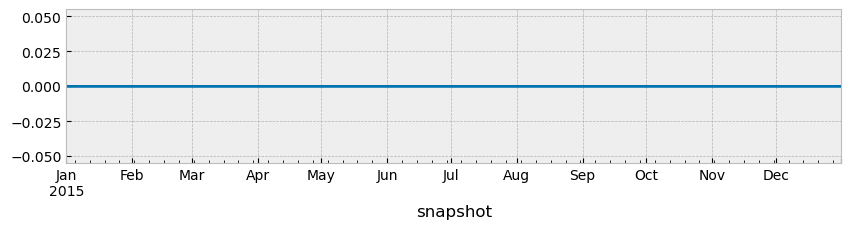

In [10]:
(n_notrick.buses_t.marginal_price["Germany"] - n_trick.buses_t.marginal_price["Germany"]).plot(figsize=(10,2))

## Two Segments

In [11]:
ELASTIC_INTERCEPT_1 = 6000
ELASTIC_SLOPE_1 = 60
ELASTIC_LOAD_1 = 95

ELASTIC_INTERCEPT_2 = 300
ELASTIC_SLOPE_2 = 30
ELASTIC_LOAD_2 = 10

In [12]:
n_notrick = n.copy()

n_notrick.add(
    "Generator",
    "load-segment-1",
    bus="Germany",
    carrier="load",
    marginal_cost=ELASTIC_INTERCEPT_1,
    marginal_cost_quadratic=ELASTIC_SLOPE_1 / 2,
    p_max_pu=0,
    p_min_pu=-1,
    p_nom=ELASTIC_LOAD_1,
)

n_notrick.add(
    "Generator",
    "load-segment-2",
    bus="Germany",
    carrier="load",
    marginal_cost=ELASTIC_INTERCEPT_2,
    marginal_cost_quadratic=ELASTIC_SLOPE_2 / 2,
    p_max_pu=0,
    p_min_pu=-1,
    p_nom=ELASTIC_LOAD_2,
)

In [13]:
n_trick = n.copy()

n_trick.add(
    "Generator",
    "load-shedding-segment-1",
    bus="Germany",
    carrier="load",
    p_nom=ELASTIC_LOAD_1,
    marginal_cost=ELASTIC_INTERCEPT_1 - ELASTIC_SLOPE_1 * ELASTIC_LOAD_1,
    marginal_cost_quadratic=ELASTIC_SLOPE_1 / 2,
)

n_trick.add(
    "Generator",
    "load-shedding-segment-2",
    bus="Germany",
    carrier="load",
    p_nom=ELASTIC_LOAD_2,
    marginal_cost_quadratic=ELASTIC_SLOPE_2 / 2,
)

n_trick.add(
    "Load",
    "load",
    bus="Germany",
    carrier="load",
    p_set=ELASTIC_LOAD_1 + ELASTIC_LOAD_2,
)

In [16]:
ELASTIC_INTERCEPT_1 - ELASTIC_SLOPE_1 * ELASTIC_LOAD_1

300

In [15]:
n_trick.optimize(solver_name='gurobi') 

INFO:linopy.model: Solve problem using Gurobi solver


Set parameter TokenServer to value "ensys3.service.tu-berlin.de"


INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 6/6 [00:00<00:00, 395.25it/s]
INFO:linopy.io: Writing time: 0.13s


Read LP format model from file /tmp/linopy-problem-xi2zm5yy.lp
Reading time = 0.03 seconds
obj: 35043 rows, 15333 columns, 62464 nonzeros
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 23.10")

CPU model: AMD Ryzen 7 PRO 7840U w/ Radeon 780M Graphics, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 35043 rows, 15333 columns and 62464 nonzeros
Model fingerprint: 0x8f782c47
Model has 4380 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-04, 2e+02]
  Objective range  [1e+03, 3e+05]
  QObjective range [1e+02, 2e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 1e+02]
Presolve removed 20762 rows and 1049 columns
Presolve time: 0.02s
Presolved: 14281 rows, 14284 columns, 40653 nonzeros
Presolved model has 4380 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Dense cols : 3
 AA' NZ     : 3.075e+04
 Factor NZ  : 1.720e+05 (

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 15333 primals, 35043 duals
Objective: 1.19e+08
Solver model: available
Solver message: 2

/home/fneum/miniconda3/envs/price-formation/lib/python3.11/site-packages/pypsa/optimization/optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext

('ok', 'optimal')

In [23]:
n_notrick.optimize(solver_name='gurobi')

INFO:linopy.model: Solve problem using Gurobi solver


Set parameter TokenServer to value "ensys3.service.tu-berlin.de"


INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 6/6 [00:00<00:00, 331.00it/s]
INFO:linopy.io: Writing time: 0.16s


Read LP format model from file /tmp/linopy-problem-yp67trhu.lp
Reading time = 0.03 seconds
obj: 35043 rows, 15333 columns, 62464 nonzeros
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 23.10")

CPU model: AMD Ryzen 7 PRO 7840U w/ Radeon 780M Graphics, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 35043 rows, 15333 columns and 62464 nonzeros
Model fingerprint: 0x3bc14700
Model has 4380 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-04, 2e+02]
  Objective range  [1e+03, 3e+05]
  QObjective range [1e+02, 2e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 1e+02]
Presolve removed 20762 rows and 1049 columns
Presolve time: 0.02s
Presolved: 14281 rows, 14284 columns, 40653 nonzeros
Presolved model has 4380 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Dense cols : 3
 AA' NZ     : 3.075e+04
 Factor NZ  : 1.720e+05 (

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 15333 primals, 35043 duals
Objective: -2.52e+09
Solver model: available
Solver message: 2

/home/fneum/miniconda3/envs/price-formation/lib/python3.11/site-packages/pypsa/optimization/optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ex

('ok', 'optimal')

In [24]:
n_trick.statistics().round() - n_notrick.statistics().round()

Optimal Capacity  \
Generator   load                                       0.0   
            onwind                                     0.0   
            solar                                      0.0   
Load        load                                       NaN   
StorageUnit hydrogen storage underground               0.0   

                                          Installed Capacity  Capacity Factor  \
Generator   load                                         0.0             -1.0   
            onwind                                       0.0              0.0   
            solar                                        0.0              0.0   
Load        load                                         NaN              NaN   
StorageUnit hydrogen storage underground                 0.0              0.0   

                                          Dispatch Transmission  Withdrawal  \
Generator   load                          919800.0          0.0   -888997.0   
            onwind                             8.0          0.0         0.0   
            solar                             -4.0          0.0         0.0   
Load        load                               NaN          NaN         NaN   
StorageUnit hydrogen storage underground      -4.0          0.0         4.0   

                                           Supply  Curtailment  \
Generator   load                          30803.0          0.0   
            onwind                            8.0         -8.0   
            solar                            -4.0          5.0   
Load        load                              NaN          NaN   
StorageUnit hydrogen storage underground     -1.0          0.0   

                                          Capital Expenditure  \
Generator   load                                          0.0   
            onwind                                        0.0   
            solar                                         0.0   
Load        load                                          NaN   
StorageUnit hydrogen storage underground                  0.0   

                                          Operational Expenditure  \
Generator   load                                     4.944953e+09   
            onwind                                   0.000000e+00   
            solar                                    0.000000e+00   
Load        load                                              NaN   
StorageUnit hydrogen storage underground             0.000000e+00   

                                              Revenue  Market Value  
Generator   load                          135101214.0           NaN  
            onwind                                0.0           0.0  
            solar                                 0.0           0.0  
Load        load                                  NaN           NaN  
StorageUnit hydrogen storage underground          0.0           0.0

<Axes: xlabel='snapshot'>

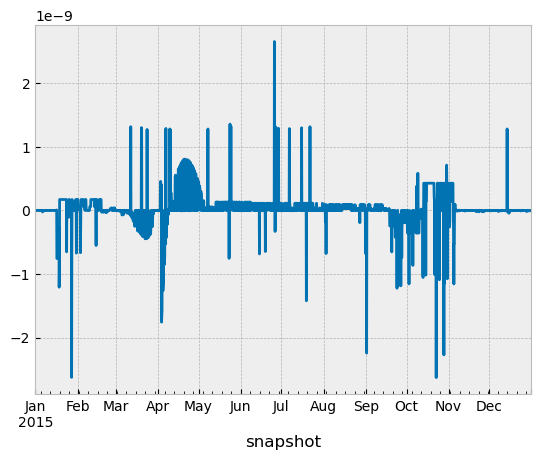

In [25]:
(n_notrick.buses_t.marginal_price["Germany"] - n_trick.buses_t.marginal_price["Germany"]).plot()

<Axes: xlabel='snapshot'>

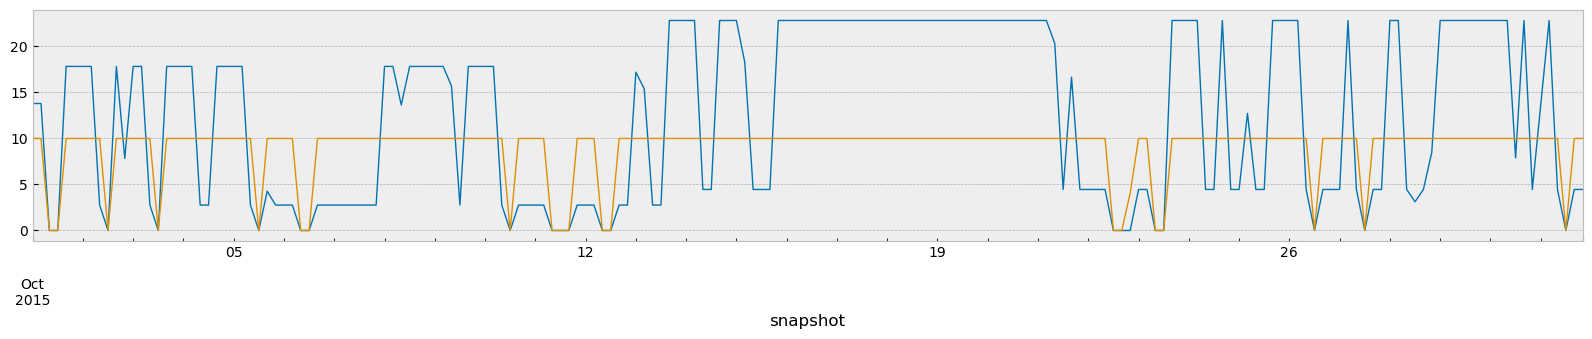

In [26]:
n_trick.generators_t.p.loc["2015-10", "load-shedding-segment-1"].plot(figsize=(20,3), linewidth=1)
n_trick.generators_t.p.loc["2015-10", "load-shedding-segment-2"].plot(figsize=(20,3), linewidth=1)